In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [39]:
# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

In [11]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 1) Convert to grayscale
    
    # Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    
    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a mask of 1's where the scaled gradient magnitude is > thresh_min and < thresh_max        
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return grad_binary

In [16]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)  # Take the gradient in x and y separately
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    abs_sobel = np.sqrt(sobelx**2 + sobely**2)  # Calculate the magnitude 
    
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))  # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    
    mag_binary = np.zeros_like(scaled_sobel)  # Create a binary mask where mag thresholds are met
    mag_binary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    
    return mag_binary

In [13]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 1) Convert to grayscale
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)  # 2) Take the gradient in x and y separately
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    abs_sobelx = np.absolute(sobelx)  # Take the absolute value of the x and y gradients
    abs_sobely = np.absolute(sobely)
    
    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dir_gradient = np.arctan2(abs_sobely, abs_sobelx)
    
    dir_binary = np.zeros_like(dir_gradient)  # Create a binary mask where direction thresholds are met
    dir_binary[(dir_gradient >= thresh[0]) & (dir_gradient <= thresh[1])] = 1
    
    return dir_binary

In [14]:
# Choose a Sobel kernel size
ksize = 9 # Choose a larger odd number to smooth gradient measurements

In [17]:
# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

In [18]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

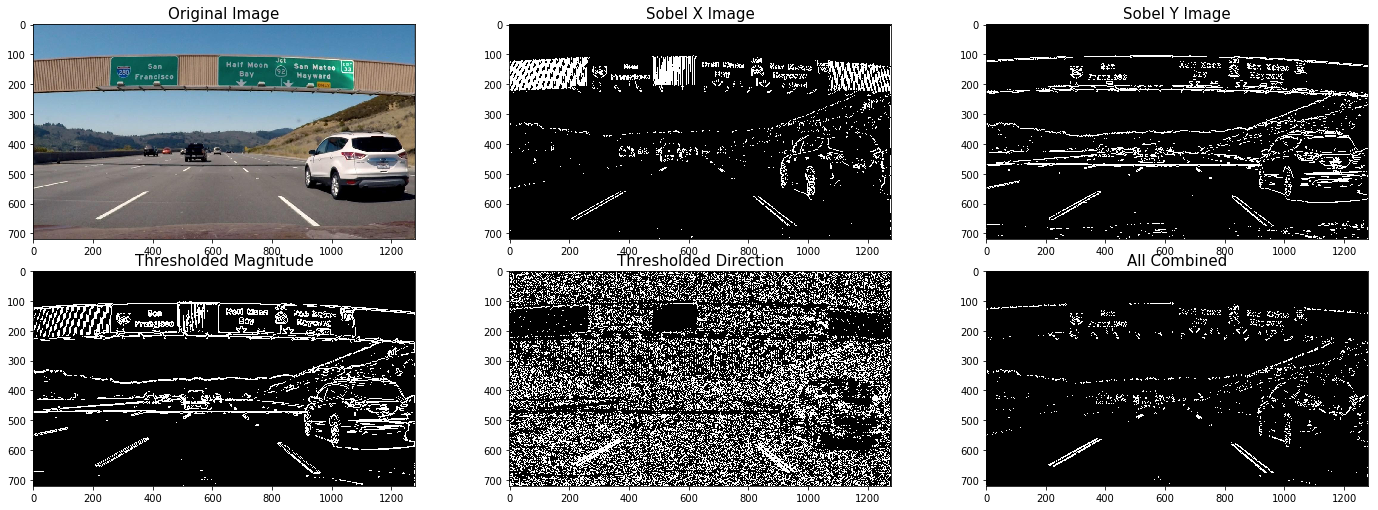

In [49]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 7))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=15)

ax2.imshow(gradx, cmap='gray')
ax2.set_title('Sobel X Image', fontsize=15)

ax3.imshow(grady, cmap='gray')
ax3.set_title('Sobel Y Image', fontsize=15)

ax4.imshow(mag_binary, cmap='gray')
ax4.set_title('Thresholded Magnitude', fontsize=15)

ax5.imshow(dir_binary, cmap='gray')
ax5.set_title('Thresholded Direction', fontsize=15)

ax6.imshow(combined, cmap='gray')
ax6.set_title('All Combined', fontsize=15)

plt.show()